3.1 RQ1: Can the availability of an Airbnb rental prop-
erty in the next 30 days be predicted using the scores
and reviews that the property has received?

Motivation: Airbnb allows renters to provide scores for
the cleanliness, location, value, and check-in experience
of the property they rented as well as a score for the
property’s owner communication. This research question
aims to determine the correlation and importance of
rental reviews towards the projected vacancy of a rental
property. Airbnb property owners may adjust their rental
strategies, including pricing, check-in methods, and
property cleanliness to increase the likelihood of rentals in
the upcoming month.

Proposed Methodology: The hypothesis which will be
evaluated during testing is that properties with higher
scores for cleanliness, location, value, and check-in
experience have fewer vacancies in the next month. Data
related to the review scores of rental properties will be
extracted, as well as the number of days that the property is
vacant in the next month. Properties that have received no
reviews will be excluded during testing. Property owners
should look to examine factors with a strong correlation
with projected vacancy to positively impact their profits

In [9]:
# ----- Import Statements ----- #
import numpy as np
import os
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [31]:
# ----- Read CSV File Into Dataframe ----- #
filepath = './../London_data/'

dfListings = pd.read_csv(os.path.join(filepath, "listings.csv"))
dfListings.head(10)

id                          listing_url       scrape_id last_scraped  \
0  198258  https://www.airbnb.com/rooms/198258  20231210055232   2023-12-10   
1   33332   https://www.airbnb.com/rooms/33332  20231210055232   2023-12-10   
2   42010   https://www.airbnb.com/rooms/42010  20231210055232   2023-12-10   
3  284603  https://www.airbnb.com/rooms/284603  20231210055232   2023-12-11   
4   89870   https://www.airbnb.com/rooms/89870  20231210055232   2023-12-10   
5  326146  https://www.airbnb.com/rooms/326146  20231210055232   2023-12-13   
6   96052   https://www.airbnb.com/rooms/96052  20231210055232   2023-12-10   
7  381467  https://www.airbnb.com/rooms/381467  20231210055232   2023-12-11   
8  390987  https://www.airbnb.com/rooms/390987  20231210055232   2023-12-10   
9  394755  https://www.airbnb.com/rooms/394755  20231210055232   2023-12-11   

            source                                               name  \
0      city scrape  Rental unit in Barking · ★4.74 · 1 bedroom · 1...   
1      city scrape  Home in  St Margaret's, Isleworth · ★4.40 · 1 ...   
2      city scrape  Home in East Finchley · ★4.88 · 1 bedroom · 1 ...   
3  previous scrape  Rental unit in London · ★4.83 · 1 bedroom · 1 ...   
4      city scrape  Rental unit in London · ★4.65 · 1 bedroom · 1 ...   
5  previous scrape          Rental unit in London · 1 bedroom · 1 bed   
6      city scrape  Condo in London · ★4.82 · 2 bedrooms · 1 bed ·...   
7  previous scrape  Rental unit in London · ★4.66 · 2 bedrooms · 2...   
8      city scrape  Home in London · ★4.73 · 8 bedrooms · 1 bed · ...   
9  previous scrape  Rental unit in London · 2 bedrooms · 2 beds · ...   

   description                              neighborhood_overview  \
0          NaN  I live in Barking town centre, at one time the...   
1          NaN                             Peaceful and friendly.   
2          NaN  We have a unique cinema called the Phoenix whi...   
3          NaN                                                NaN   
4          NaN  Finsbury Park is a friendly melting pot commun...   
5          NaN                                                NaN   
6          NaN  Residential, quiet and green neighbourhood wit...   
7          NaN  Peaceful and quite with beautiful tree lined s...   
8          NaN  The neighbourhood is safe and many new cafes a...   
9          NaN                                                NaN   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/airflow/Hosti...   967537  ...   
1  https://a0.muscache.com/pictures/miso/Hosting-...   144444  ...   
2  https://a0.muscache.com/pictures/airflow/Hosti...   157884  ...   
3  https://a0.muscache.com/pictures/3246231/8e9b1...  1481851  ...   
4  https://a0.muscache.com/pictures/miso/Hosting-...    54730  ...   
5  https://a0.muscache.com/pictures/3536712/9c7a9...  1667975  ...   
6  https://a0.muscache.com/pictures/airflow/Hosti...   448154  ...   
7  https://a0.muscache.com/pictures/4700556/fcce1...  1913410  ...   
8  https://a0.muscache.com/pictures/8841768/8130b...  1955537  ...   
9  https://a0.muscache.com/pictures/2b043814-44d7...  1973515  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.88                   4.45                4.68   
1                        4.53                   4.68                4.26   
2                        4.95                   4.73                4.87   
3                        5.00                   5.00                4.83   
4                        4.91                   4.73                4.50   
5                         NaN                    NaN                 NaN   
6                        4.90                   4.45                4.70   
7                        4.82                   4.88                4.64   
8                        4.83                   4.75                4.75   
9                        5.00             

In [34]:
# ----- Perform Feature Extraction ----- #
selected_attributes = ['availability_30', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

dfListings = dfListings[selected_attributes]
dfListings.dropna(how='any', inplace=True)
dfListings = dfListings[(dfListings['review_scores_rating']>=3.5) & (dfListings['review_scores_accuracy']>=3.5) & (dfListings['review_scores_cleanliness']>=3.5) & (dfListings['review_scores_checkin']>=3.5) &(dfListings['review_scores_communication']>=3.5) & (dfListings['review_scores_location']>=3.5) & (dfListings['review_scores_value']>=3.5)]
print("Number of Rows: "+str(len(dfListings)))

Number of Rows: 63350


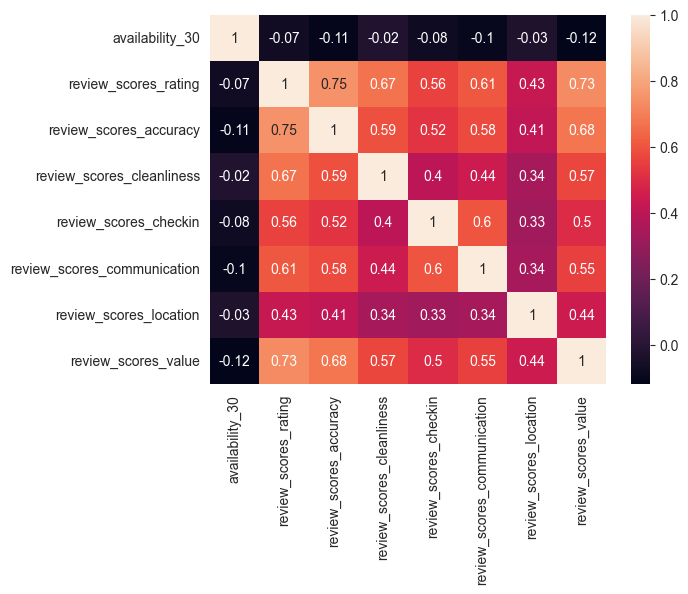

In [35]:
# ----- Perform Correlation Analysis ----- #
corr = dfListings.corr(method='pearson').round(2)
corr_map = sns.heatmap(corr, annot=True)

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def train_test(model, train, test):
    y_train = train['vacancies_30']
    y_test = test['vacancies_30']
    x_train = train.drop(['vacancies_30', 'availability_30'], axis=1)
    x_test = test.drop(['vacancies_30', 'availability_30'], axis=1)
        
    # Evaluate performance with regular sale price
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    print("RMSE train: {}".format(rmse(y_train, y_pred_train)))
    print("RMSE test: {}".format(rmse(y_test, y_pred_test)))

    return y_pred_train, y_pred_test

def plot_results(df_results, model_name):
    x_data = 'vacancies_30'
    y_data = 'pred_vacancies_30'
    plot_title = "True Versus Predicted Vacancies in Next 30 Days - " + model_name
    fig_results = px.scatter(df_results, x=x_data, y=y_data, title=plot_title, color='train_or_test')
    fig_results.add_shape(type='line', x0=0, y0=0,x1=df_results[x_data].max(), y1=df_results[x_data].max(),line=dict(color='red', dash='dash'),name='y=x')
    return fig_results

# ---- Create Model ----
model_GBR = GradientBoostingRegressor() 
model_linear = LinearRegression()

# ---- Split into training/testing data ----
dfListings.loc[:,'vacancies_30'] = 30 - dfListings['availability_30']
print(dfListings[['vacancies_30', 'availability_30']].head(10))
train, test = train_test_split(dfListings, test_size=0.2, shuffle=True)
# Create copies of the training and testing data or comparison with Model B
copy_train = train.copy()
copy_test = test.copy()

# ---- Model A ----
print("--- MODEL A ---")
y_pred_train, y_pred_test = train_test(model_linear, train, test)
train.loc[:, 'pred_vacancies_30'] = y_pred_train
train.loc[:, 'train_or_test'] = 'Train'
test.loc[:, 'pred_vacancies_30'] = y_pred_test
test.loc[:, 'train_or_test'] = 'Test'
print(train[['vacancies_30','pred_vacancies_30']])
results_A = pd.concat([train, test], ignore_index=True)
fig_results_A = plot_results(results_A, "Model A")
fig_results_A.show()
    
# ---- Model B ----
print("--- MODEL B ---")
y_pred_train, y_pred_test = train_test(model_GBR, copy_train, copy_test)
copy_train.loc[:, 'pred_vacancies_30'] = y_pred_train
copy_train.loc[:, 'train_or_test'] = 'Train'
copy_test.loc[:, 'pred_vacancies_30'] = y_pred_test
copy_test.loc[:, 'train_or_test'] = 'Test'
results_B = pd.concat([copy_train, copy_test], ignore_index=True)

fig_results_B = plot_results(results_B, "Model B")
fig_results_B.show()

    vacancies_30  availability_30
0              2               28
1              0               30
2             21                9
3             30                0
4              8               22
6             13               17
7             30                0
8             30                0
9             30                0
10            30                0
--- MODEL A ---
RMSE train: 9.7015445422402
RMSE test: 9.695691557403752
       vacancies_30  pred_vacancies_30
41650            11          24.609349
58543            30          21.936163
6380             30          20.847460
49813            30          20.264474
75286            30          22.004724
...             ...                ...
71315            10          22.506021
40569            25          20.752324
66190            30          22.344684
34537            27          21.807501
1135             30          21.350845

[50680 rows x 2 columns]


--- MODEL B ---
RMSE train: 9.616327660956134
RMSE test: 9.66761188358144
